In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",200)
import scipy as sp
from langdetect import detect
from textblob import TextBlob , Word
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter('ignore') #uyarıları görmemek için.
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #başarıyı öğrenmek için
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB #binary ise evet- hayır, 1-0
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #pozitif, negatif, nötr ise 

vect=CountVectorizer()
nb=MultinomialNB()

r = RandomForestClassifier()
gbc = GradientBoostingClassifier()
d = DecisionTreeClassifier()
log = LogisticRegression()
k = KNeighborsClassifier()
g = GaussianNB()
b = BernoulliNB()
xgbc = XGBClassifier()

#### İşletme Hedefi

Bir şirket, hedeflenen pazarlamaya ve satın alma alışkanlıklarını anlamaya yardımcı olmak için veri bilimi ekibinden müşteri tabanını segmentlere ayırmasını istedi.

### Hedefler:
1. Bu proje için ilk adım, veri setini içe aktarmak ve üç veri çerçevesi oluşturmaktır.
    * Müşteri (Customer)
    * Ürünler (Products)
    * Siparişler (Orders)  
2.  Üç veri çerçevesini bir SQLite veritabanına ekleyin
3.  Tabloları veritabanından içe aktarın ve bunları tek bir veri çerçevesinde birleştirin
4.  KMeans kullanarak müşterileri segmentlere ayırın ve segmentlerin özelliklerini vurgulayın
5.  Müşteri segmenti sayısının seçimi gerekçelendirilmelidir
6.  RFM tablosu oluşturun (Yenilik, Sıklık ve Para) (Recency, Frequency and Money)

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv", encoding = "ISO-8859-1")
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [4]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
2011,1676,Martin,Ellenby,NaN,1444446467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1456953378,0.0,6932,1676,Martin,Ellenby,NaN,6932,NaN,NaN,NaN,USD,NaN,30.45,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.40,NaN,fedex,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.444447e+09,NaN,authorize.net,NaN,40.40,NaN,7601600676,05639D,NaN,1,1444446531,1.445356e+09,1.444689e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8817,6932,1412.0,"Prot

In [5]:
df.shape

(4194, 181)

In [6]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [7]:
df= df[["Customers.id" , "Order_Items.qty" , "Orders.total", "Customers.create_date","Customers.last_modified",]]
df.head()

,Customers.id,Order_Items.qty,Orders.total,Customers.create_date,Customers.last_modified
0,797,1,64.29,1426018724,1437764306
1,3,4,29.99,1386089139,1437764354
2,3,1,78.73,1386089139,1437764354
3,4,1,29.55,1386780263,1437762646
4,5,1,46.00,1386861599,1437764316


In [8]:
df = df.groupby("Customers.id" ,as_index =False).sum()
df.head()

,Customers.id,Order_Items.qty,Orders.total,Customers.create_date,Customers.last_modified
0,3,5,108.72,2772178278,2875528708
1,4,1,29.55,1386780263,1437762646
2,5,3,124.99,4160584797,4313292948
3,7,1,49.14,1388155947,1437763617
4,8,1,69.70,1389303216,1437763421


In [23]:
df.shape

(3048, 5)

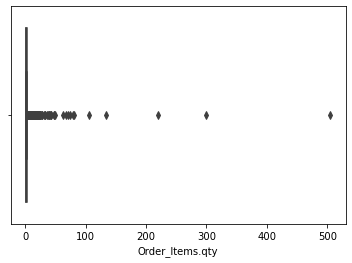

In [9]:
sns.boxplot(df["Order_Items.qty"]);

In [10]:
df =df [df["Order_Items.qty"] <100]

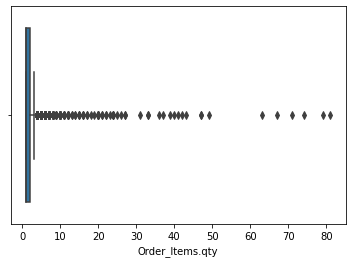

In [11]:
sns.boxplot(df["Order_Items.qty"]);

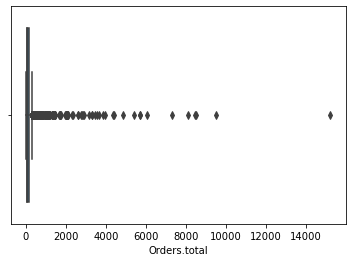

In [12]:
sns.boxplot(df["Orders.total"]);

In [13]:
df =df [df["Orders.total"] <10000]

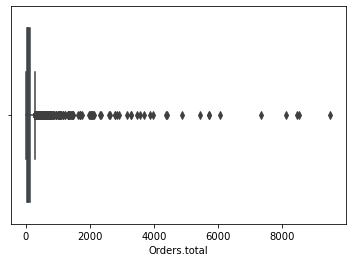

In [14]:
sns.boxplot(df["Orders.total"]);

In [15]:
model = KMeans(n_clusters=4) #Veriyi 4'e böldüm.
model = model.fit(df)
pred = model.predict(df)

In [16]:
silhouette_score(df,pred) #Başarı oranı

0.8932409893381581

In [17]:
clust = df.assign(Cluster = model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([0, 0, 2, ..., 0, 0, 0])

No handles with labels found to put in legend.


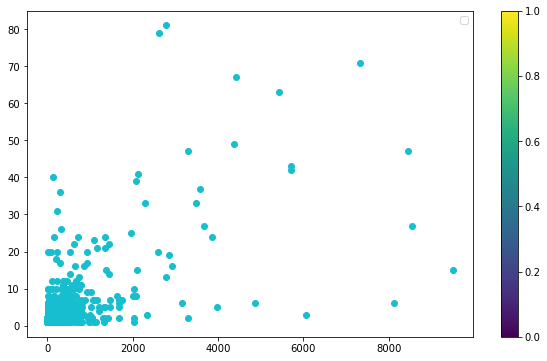

In [18]:
plt.figure(figsize = (10,6))
plt.scatter(df["Orders.total"],df["Order_Items.qty"],c='#17becf')
plt.legend()
plt.colorbar()
plt.show()

In [19]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(df)
        score=silhouette_score(df,pred)
        print(f'Number of cluster {no_of_cluster}, silhoutte {score}')
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)
#cluster' değişmediği noktada durmak gerekiyor.
#4 gruba ayırmak mantıklıymış. 

Number of cluster 2, silhoutte 0.9642279859547469
Number of cluster 3, silhoutte 0.9106465115169197
Number of cluster 4, silhoutte 0.8932409893381581
Number of cluster 5, silhoutte 0.9445717895787658
Number of cluster 6, silhoutte 0.9448951965210443
Number of cluster 7, silhoutte 0.9457881689779255
Number of cluster 8, silhoutte 0.9651490312195816
Number of cluster 9, silhoutte 0.96589017856729
Number of cluster 10, silhoutte 0.9769507851212926


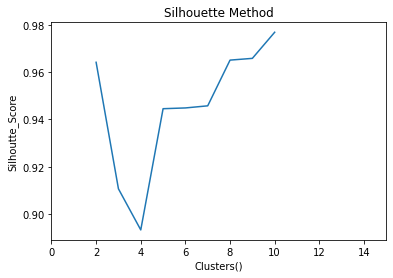

In [20]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()


In [21]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(df)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(df,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)


Number of cluster 2, silhouette 0.9642279859547469
Number of cluster 3, silhouette 0.9106465115169197
Number of cluster 4, silhouette 0.8932409893381581
Number of cluster 5, silhouette 0.9445717895787658
Number of cluster 6, silhouette 0.9456251604081076
Number of cluster 7, silhouette 0.9457881689779255
Number of cluster 8, silhouette 0.9653083701254044
Number of cluster 9, silhouette 0.9652822158528708


Text(0.5, 1.0, 'The Elbow Method showing optimal K')

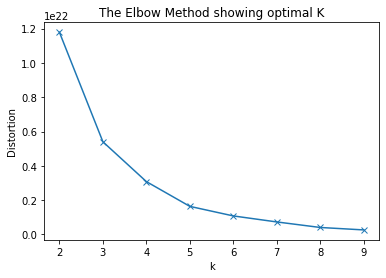

In [22]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
#dirseğin kıırldığı noktalar kaça bölmemizi gösteriyor. 4 mantıklı